<H1 align="center"><FONT FACE="modern" SIZE=5 COLOR="#1E8449  ">CARGAR MULTIPLES IMÁGENES SENTINEL 2 EN R</FONT></H1>

In [1]:
if(!require(raster)){install.packages('raster'); library(raster)} else {library(raster)}
if(!require(rgdal)){install.packages('rgdal'); library(rgdal)} else {library(rgdal)}
if(!require(gdalUtils)){install.packages('gdalUtils'); library(gdalUtils)} else {library(gdalUtils)}

Loading required package: raster
Loading required package: sp
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.0, released 2017/04/28
 Path to GDAL shared files: C:/Users/FM/Documents/R/win-library/3.4/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/FM/Documents/R/win-library/3.4/rgdal/proj
 Linking to sp version: 1.2-7 
Loading required package: gdalUtils


In [5]:
convierte = function(dir){
    lista= list.files(dir, full.names = T,pattern = "jp2")# Lista los nombres del directorio
    jp2=as.list(lista)# Convierte en una lista
    tif=lapply( jp2,FUN = batch_gdal_translate, dir, outsuffix = ".tif")# 
}

In [15]:
dir = setwd("D:/s2/R10M")

In [ ]:
convierte(dir)

In [12]:
lee_tiff = function(dir){
    listar= list.files(dir, full.names = T,pattern = "tif")# Lista los nombres del directorio
    lista=as.list(listar)# Convierte en una lista
    apila=stack(lista)
    bloque=brick(apila)
}

In [16]:
img=lee_tiff(dir)
names(img) = paste0( c ("B2","B3","B4","B8"))

In [17]:
img

class       : RasterBrick 
dimensions  : 10980, 10980, 120560400, 4  (nrow, ncol, ncell, nlayers)
resolution  : 10, 10  (x, y)
extent      : 699960, 809760, 490200, 6e+05  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=18 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : C:\Users\FM\AppData\Local\Temp\Rtmp8sAtZv\raster\r_tmp_2018-08-09_193347_8696_75269.grd 
names       :    B2,    B3,    B4,    B8 
min values  :     1,     1,     1,     1 
max values  : 19421, 18158, 17270, 16214 


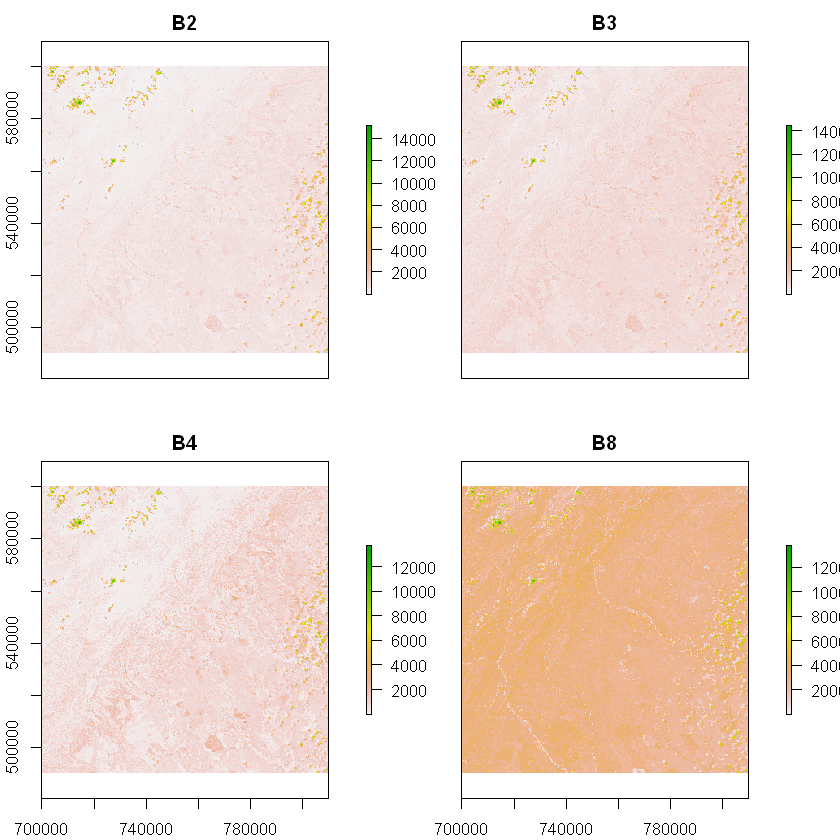

In [18]:
plot(img)

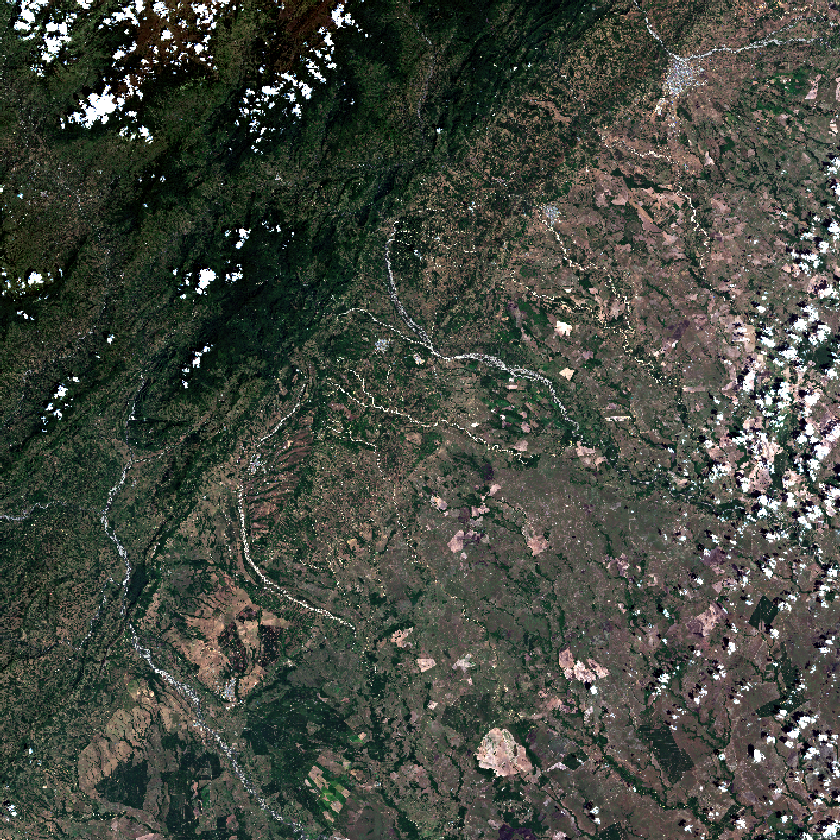

In [20]:
plotRGB(img,r=3,g=2,b=1, stretch = "lin")